In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from datetime import datetime


df = pd.read_csv (r"F:\Shr_Priv\Materials_Mgt_DataTeam\Laura Eshee\Demand Forcasting\Output Files\Demand Forecasting Data Wrangling Sample.csv", index_col=0, low_memory=False, skipinitialspace=True)

df.reset_index(inplace=True, drop=True)

print(df.head())
print(df.info())


   Company   Item                     Description  Qty STOCK_UOM Trans_UOM  \
0      240  59417  UNDERPAD INCONT 24X17IN         300      EA        CS     
1      300  59417  UNDERPAD INCONT 24X17IN         300      EA        CS     
2      300  59417  UNDERPAD INCONT 24X17IN         300      EA        CS     
3      300  59417  UNDERPAD INCONT 24X17IN         900      EA        CS     
4      300  59417  UNDERPAD INCONT 24X17IN         600      EA        CS     

   UNIT_COST  Ext Amount  TRANS_DATE Item Type  ... ALT_UOM_CONV_05  \
0     0.0601       18.03  2020-05-04         I  ...               0   
1     0.0601       18.03  2020-05-05         I  ...               0   
2     0.0601       18.03  2020-05-05         I  ...               0   
3     0.0601       54.09  2020-05-27         I  ...               0   
4     0.0601       36.06  2020-06-18         I  ...               0   

   ALT_UOM_CONV_06 BUY_FL_01  BUY_FL_02  BUY_FL_03  BUY_FL_04 BUY_FL_05  \
0                0       NaN 

In [2]:
for col in ['Company','Document','Line Nbr','Req Nbr','From Location','Req Location']:
    df[col] = df[col].astype('category')
    
df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109157 entries, 0 to 109156
Data columns (total 46 columns):
Company            109157 non-null category
Item               109157 non-null int64
Description        109157 non-null object
Qty                109157 non-null int64
STOCK_UOM          109157 non-null object
Trans_UOM          109157 non-null object
UNIT_COST          109157 non-null float64
Ext Amount         109157 non-null float64
TRANS_DATE         109157 non-null datetime64[ns]
Item Type          109157 non-null object
Sys                109157 non-null object
Document           109157 non-null category
Doc Type           109157 non-null object
Line Nbr           109157 non-null category
Req Nbr            109157 non-null category
From Location      109157 non-null category
Req Location       109157 non-null category
TRACKING_FL_01     109157 non-null object
TRACKING_FL_02     0 non-null float64
TRACKING_FL_03     0 non-null float64
TRACKING_FL_04     0 non-null float64

In [3]:
print(list(df.columns.values))

['Company', 'Item', 'Description', 'Qty', 'STOCK_UOM', 'Trans_UOM', 'UNIT_COST', 'Ext Amount', 'TRANS_DATE', 'Item Type', 'Sys', 'Document', 'Doc Type', 'Line Nbr', 'Req Nbr', 'From Location', 'Req Location', 'TRACKING_FL_01', 'TRACKING_FL_02', 'TRACKING_FL_03', 'TRACKING_FL_04', 'TRACKING_FL_05', 'TRACKING_FL_06', 'TRACKING_FL_07', 'TRACKING_FL_08', 'TRACKING_FL_09', 'ALT_UOM_01', 'ALT_UOM_02', 'ALT_UOM_03', 'ALT_UOM_04', 'ALT_UOM_05', 'ALT_UOM_06', 'ALT_UOM_CONV_01', 'ALT_UOM_CONV_02', 'ALT_UOM_CONV_03', 'ALT_UOM_CONV_04', 'ALT_UOM_CONV_05', 'ALT_UOM_CONV_06', 'BUY_FL_01', 'BUY_FL_02', 'BUY_FL_03', 'BUY_FL_04', 'BUY_FL_05', 'BUY_FL_06', 'Track_UOM_Conv', 'conv_qty']


In [4]:
df.describe()

,Item,Qty,UNIT_COST,Ext Amount,TRACKING_FL_02,TRACKING_FL_03,TRACKING_FL_04,TRACKING_FL_05,TRACKING_FL_06,TRACKING_FL_07,...,ALT_UOM_CONV_05,ALT_UOM_CONV_06,BUY_FL_01,BUY_FL_02,BUY_FL_03,BUY_FL_04,BUY_FL_05,BUY_FL_06,Track_UOM_Conv,conv_qty
count,109157.000000,109157.000000,109157.000000,109157.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,109157.0,109157.0,76953.0,97459.000000,60950.000000,2170.0,0.0,0.0,109157.0,109157.000000
mean,63598.408100,155.922964,1.313203,66.582345,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,2.105388,1.124266,1.0,NaN,NaN,1.0,155.922964
std,50002.044314,612.662630,2.511568,226.763081,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2.142587,0.983354,0.0,NaN,NaN,0.0,612.662630
min,17.000000,-13920.000000,0.004400,-3333.840000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,1.000000,1.000000,1.0,NaN,NaN,1.0,-13920.000000
25%,1398.000000,10.000000,0.141300,6.860000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,1.000000,1.000000,1.0,NaN,NaN,1.0,10.000000
50%,73228.000000,48.000000,0.440100,15.850000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,2.000000,1.000000,1.0,NaN,NaN,1.0,48.000000
75%,108503.000000,125.000000,1.500300,44.150000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,2.000000,1.000000,1.0,NaN,NaN,1.0,125.000000
max,130177.000000,80000.000000,43.190300,9600.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,9.000000,9.000000,1.0,NaN,NaN,1.0,80000.000000


                 Count
Document         30306
Ext Amount        4804
Req Location      1126
UNIT_COST          438
conv_qty           244
Qty                244
TRANS_DATE         138
Item                92
Description         92
ALT_UOM_CONV_02     27
ALT_UOM_CONV_03     23
Company             14
ALT_UOM_02           6
STOCK_UOM            6
Trans_UOM            6
ALT_UOM_01           6
ALT_UOM_CONV_04      3
BUY_FL_02            3
BUY_FL_03            3
ALT_UOM_03           3
Sys                  2
Doc Type             2
From Location        1
BUY_FL_04            1
BUY_FL_01            1
Item Type            1
ALT_UOM_CONV_06      1
Line Nbr             1
Req Nbr              1
ALT_UOM_CONV_05      1
ALT_UOM_CONV_01      1
TRACKING_FL_01       1
Track_UOM_Conv       1
ALT_UOM_04           1
TRACKING_FL_02       0
TRACKING_FL_03       0
TRACKING_FL_04       0
TRACKING_FL_05       0
TRACKING_FL_07       0
TRACKING_FL_08       0
TRACKING_FL_09       0
ALT_UOM_05           0
ALT_UOM_06 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

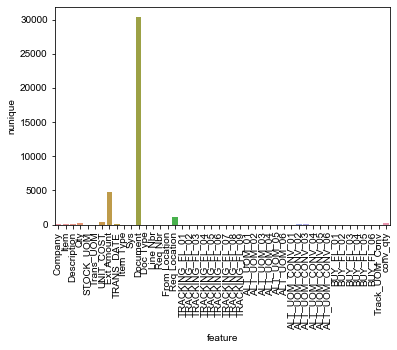

In [5]:
res = df.nunique()\
        .sort_values(ascending=False)\
        .rename('Count')\
        .to_frame()
print(res)

    
nu = df.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
sns.set(rc={'figure.figsize':(50,10)})
plt.xticks(rotation=90)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024839302388>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109157 entries, 0 to 109156
Data columns (total 46 columns):
Company            109157 non-null category
Item               109157 non-null int64
Description        109157 non-null object
Qty                109157 non-null int64
STOCK_UOM          109157 non-null object
Trans_UOM          109157 non-null object
UNIT_COST          109157 non-null float64
Ext Amount         109157 non-null float64
TRANS_DATE         109157 non-null datetime64[ns]
Item Type          109157 non-null object
Sys                109157 non-null object
Document           109157 non-null category
Doc Type           109157 non-null object
Line Nbr           109157 non-null category
Req Nbr            109157 non-null category
From Location      109157 non-null category
Req Location       109157 non-null category
TRACKING_FL_01     109157 non-null object
TRACKING_FL_02     0 non-null float64
TRAC

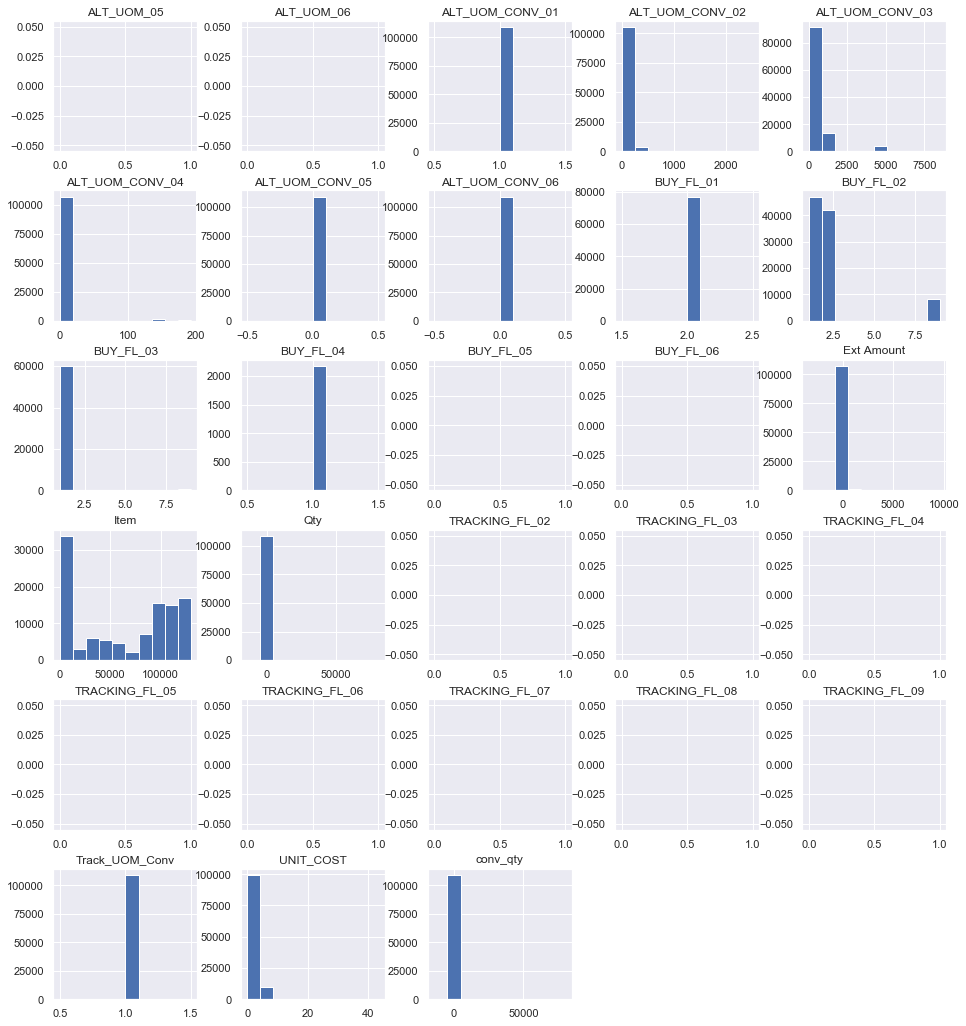

In [6]:
print(df.hist(figsize = (16,18)))

print(df.info())
print(df.conv_qty)

In [7]:
# Any missing values?
print (df.isnull().values.any())
print('\n')

# Total missing values for each feature
print (df.isnull().sum())
print('\n')

# Total number of missing values
print (df.isnull().sum().sum())

True


Company                 0
Item                    0
Description             0
Qty                     0
STOCK_UOM               0
Trans_UOM               0
UNIT_COST               0
Ext Amount              0
TRANS_DATE              0
Item Type               0
Sys                     0
Document                0
Doc Type                0
Line Nbr                0
Req Nbr                 0
From Location           0
Req Location            0
TRACKING_FL_01          0
TRACKING_FL_02     109157
TRACKING_FL_03     109157
TRACKING_FL_04     109157
TRACKING_FL_05     109157
TRACKING_FL_06     109157
TRACKING_FL_07     109157
TRACKING_FL_08     109157
TRACKING_FL_09     109157
ALT_UOM_01              0
ALT_UOM_02              0
ALT_UOM_03          46971
ALT_UOM_04         106987
ALT_UOM_05         109157
ALT_UOM_06         109157
ALT_UOM_CONV_01         0
ALT_UOM_CONV_02         0
ALT_UOM_CONV_03         0
ALT_UOM_CONV_04         0
ALT_UOM_CONV_05         0
ALT_UOM_CONV_06         0
BUY_F

Text(0, 0.5, 'Count of Item')

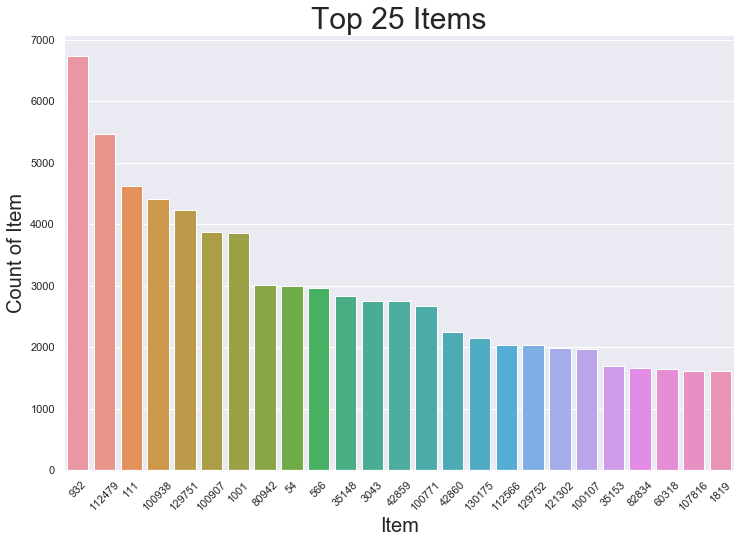

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="Item", data=df, order=df.Item.value_counts().iloc[:25].index)
plt.xticks(rotation=45)
plt.title('Top 25 Items', fontsize=30)
plt.xlabel('Item', fontsize=20)
plt.ylabel('Count of Item', fontsize=20)

In [9]:
df.sort_values(['Item','TRANS_DATE'], ascending=[True,True], inplace=True)
print(df)

      Company    Item                     Description  Qty STOCK_UOM  \
81832     220      17  APPLICATOR FBRTP 6IN STRL 2 P   100      PK     
81877     210      17  APPLICATOR FBRTP 6IN STRL 2 P   100      PK     
82008     220      17  APPLICATOR FBRTP 6IN STRL 2 P   100      PK     
82034     240      17  APPLICATOR FBRTP 6IN STRL 2 P   100      PK     
82036     240      17  APPLICATOR FBRTP 6IN STRL 2 P   100      PK     
...       ...     ...                             ...  ...       ...   
47985     210  130177  SYRINGE INSN HYPODERM 29GX.5IN  100      EA     
47987     230  130177  SYRINGE INSN HYPODERM 29GX.5IN  100      EA     
47989     210  130177  SYRINGE INSN HYPODERM 29GX.5IN  100      EA     
47995     210  130177  SYRINGE INSN HYPODERM 29GX.5IN  200      EA     
48052     210  130177  SYRINGE INSN HYPODERM 29GX.5IN  100      EA     

      Trans_UOM  UNIT_COST  Ext Amount TRANS_DATE Item Type  ...  \
81832      BX        0.023         2.3 2020-01-02         I  ...   

In [10]:
#df.index = pd.to_datetime(df['TRANS_DATE'], format='%Y%j')
#print(df.head())

In [11]:
#https://stackoverflow.com/questions/45281297/group-by-week-in-pandas

#df_group = df.groupby(['Item', df['TRANS_DATE'].dt.strftime('%W-SAT')])#['conv_qty'].sum()
df_group = (df.reset_index().set_index('Item').groupby(['Item','TRANS_DATE',pd.Grouper(freq='W-SAT')]))['conv_qty'].sum().astype(int)
#df_group = df_group.aggregate(np.sum)
df_group = df_group["DayOfWeek"] = df_group["TRANS_DATE"].dt.dayofweek
#df_group.set_index('Item')
print(df_group)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
#https://stackoverflow.com/questions/43832311/how-to-plot-by-category-over-time

fig, ax = plt.subplots()

for key, data in df_group.groupby('Item'):
    data.plot(x='TRANS_DATE', y='conv_qty', ax=ax, label=key)

In [ ]:
#df_gr = df.groupby(['TRANS_DATE'.dt.strftime('%W'), 'Item'])['conv_qty'].sum()
plot_df = df_group.unstack('Item').loc[:, 'conv_qty']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq='B')
plot_df.plot(subplots=True)

In [ ]:
num_periods = 104
ts_pd = pd.Series(range(num_periods), pd.period_range('2018-05-31', freq = 'W-SAT', periods = num_periods))
print(ts_pd)

In [ ]:
from tqdm import tqdm
for date in tqdm(df['TRANS_DATE']):
    if date in ts_pd:
        df['Week'] = ts_pd
        
print(df['Week'])